In [ ]:
!pip install pandas-datareader==0.10.0 yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.3/114.3 KB 14.1 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt

from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()
plt.style.use('ggplot')

In [ ]:
ticker = 'GOOG'
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2022, 1, 24)

stock_data = pdr.get_data_yahoo(ticker, start=start, end=end)
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,67.077499,68.406998,67.077499,68.368500,68.368500,28132000
2020-01-03,67.392998,68.625000,67.277199,68.032997,68.032997,23728000
2020-01-06,67.500000,69.824997,67.500000,69.710503,69.710503,34646000
2020-01-07,69.897003,70.149498,69.518997,69.667000,69.667000,30054000
2020-01-08,69.603996,70.579002,69.542000,70.216003,70.216003,30560000


In [ ]:
returns = stock_data['Adj Close'].pct_change()
daily_vol = returns.std()

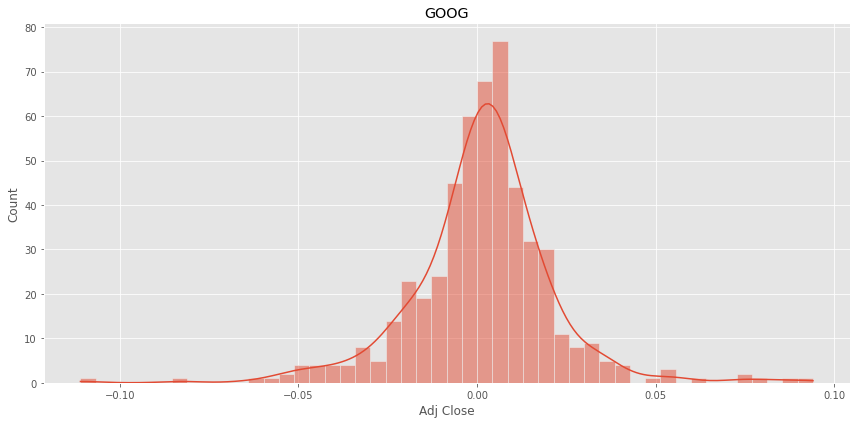

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
ax = sns.histplot(returns,kde=True)
ax.set_title(ticker)
fig.tight_layout()

In [ ]:
def monte_carlo(n_simulations,n_samples,std,val_ini):
  mc = pd.DataFrame()
  last_simulations = list()
  for s in range(n_simulations):
    list_simulations = list()
    list_simulations.append(val_ini * (1 + np.random.normal(0,std)))
    for i in range(n_samples):
      list_simulations.append(list_simulations[i] * (1 + np.random.normal(0,std)))   
    mc = pd.concat([mc,pd.DataFrame({s:list_simulations})],axis=1)   
    last_simulations.append(list_simulations[-1])

  return mc,last_simulations

In [ ]:
last_price = stock_data['Adj Close'][-1]
df,lasts = monte_carlo(n_simulations = 1000,
                       n_samples = 251,
                       std = daily_vol,
                       val_ini = last_price)

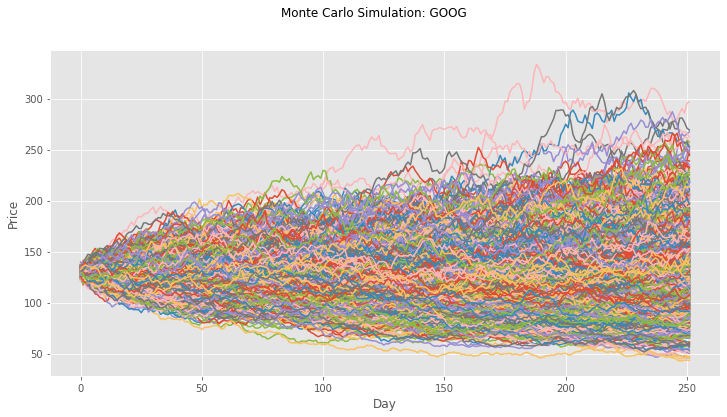

In [ ]:
fig = plt.figure(figsize=(12,6))
fig.suptitle(f"Monte Carlo Simulation: {ticker}")
plt.plot(df)
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [ ]:
print("Expected price: ", round(np.mean(lasts),2))
print("Quantile (5%): ",np.percentile(lasts,5))
print("Quantile (95%): ",np.percentile(lasts,95))

Expected price:  129.34
Quantile (5%):  72.97911595293202
Quantile (95%):  206.37860384964668


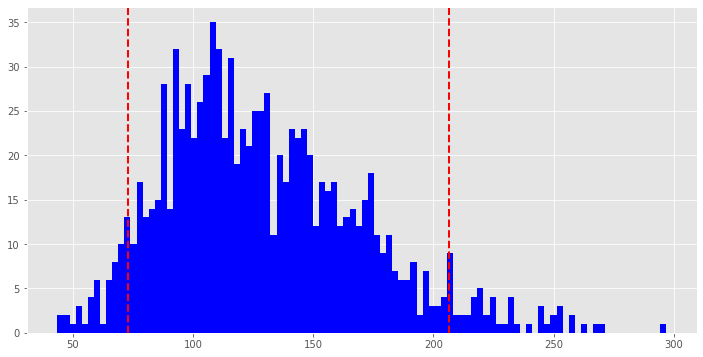

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
ax.hist(lasts,bins=100,color='blue')
ax.axvline(np.percentile(lasts,5), color='r', linestyle='dashed', linewidth=2)
ax.axvline(np.percentile(lasts,95), color='r', linestyle='dashed', linewidth=2)
fig.show()